# Wireless EEG systems
Plot data of the wEEG systems

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from brokenaxes import brokenaxes
from matplotlib.lines import Line2D

# Major ticks and minor ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


from matplotlib.patches import Rectangle 

In [40]:
# Open Googlesheet csv file
df = pd.read_csv('/Users/guiomar/Downloads/Data_Figures - Devices(4).csv')
#df.head()

## Devices
Devices

In [41]:
# Datos

DEV = df['Device']
COMP = df['Company']
SENSTYPE = df['Sensor Type']
NSENS = df['Num of Sensors (MAX)']
SR = df['Sampling Rate (Hz) (MAX)']
RES = df['D. Resolution (bits)']
BAT = df['Battery Life (h)']
WIRE = df['Wireless Protocol']
CERT = df['Certified Medical']

In [42]:
DATOS = pd.DataFrame(
    {'device': DEV,
     'company': COMP,
     'sensors': NSENS,
     'sentype': SENSTYPE,
     'sampling': SR,
     'resolution': RES,
     'battery': BAT,
     'wireless': WIRE,
     'certification': CERT})
#DATOS

In [43]:
dry = [i for i, s in enumerate(SENSTYPE) if 'Dry' in s]
wet = [i for i, s in enumerate(SENSTYPE) if 'Wet' in s]
gel = [i for i, s in enumerate(SENSTYPE) if 'Gel' in s]
#DATOS['device'][dry]
ble = [i for i, s in enumerate(WIRE) if 'BLE' in s]
bluetooth = [i for i, s in enumerate(WIRE) if 'Bluetooth' in s]
wifi = [i for i, s in enumerate(WIRE) if 'Wi-Fi' in s]
prop = [i for i, s in enumerate(WIRE) if 'Prop 2.4GHz' in s]
#DATOS['device'][ble]
ce = [i for i, s in enumerate(CERT) if 'CE' in s]
fda = [i for i, s in enumerate(CERT) if 'FDA' in s]
no = [i for i, s in enumerate(CERT) if '✕' in s]
#DATOS['device'][no]

In [85]:
DATOS['marker']='x'
DATOS['markersize']=300
DATOS['color']='w'
DATOS['borde']='w'

DATOS.loc[DATOS.sentype=='Dry','color']='y'
DATOS.loc[DATOS.sentype=='Wet','color']='c'
DATOS.loc[DATOS.sentype=='Gel','color']='m'
DATOS.loc[DATOS.sentype=='Dry/Wet','color']='g'
DATOS.loc[DATOS.sentype=='Wet/Gel','color']='b'
DATOS.loc[DATOS.sentype=='Dry/Gel','color']='orange'
DATOS.loc[DATOS.sentype=='Dry/Wet/Gel','color']='k'

DATOS.loc[DATOS.wireless=='BLE','marker']='D'
DATOS.loc[DATOS.wireless=='Bluetooth','marker']='s'
DATOS.loc[DATOS.wireless=='Wi-Fi','marker']='^'
DATOS.loc[DATOS.wireless=='Prop 2.4GHz','marker']='o'
DATOS.loc[DATOS.wireless=='BLE/Wi-Fi','marker']='d'
DATOS.loc[DATOS.wireless=='BLE/Wi-Fi','markersize']=450

DATOS.loc[DATOS.certification=='CE/FDA','borde']='k'
DATOS.loc[DATOS.certification=='CE','borde']='grey'

DATOS

,device,company,sensors,sentype,sampling,resolution,battery,wireless,certification,marker,color,borde,markersize
0,MindWave Mobile 2,Neurosky,1.0,Dry,512,12,43683,BLE,✕,D,y,w,300
1,BrainLink Pro,Neurosky,3.0,Dry,250,16,7,BLE,✕,D,y,w,300
2,Ganglion,OpenBCI,4.0,Dry/Gel,200,24,NaN,BLE/Wi-Fi,✕,d,orange,w,450
3,NeXus-10 MKII,Mindmedia,4.0,Gel,8192,24,5,Bluetooth,CE/FDA,s,m,k,300
4,INSIGHT,Emotiv,5.0,Wet,128,14,4,BLE,✕,D,c,w,300
5,MUSE 2,InteraXon,4.0,Dry,1000,12,10,Bluetooth,✕,s,y,w,300
6,VR300,Wearable Sensing,7.0,Dry,300,16,x,Bluetooth,✕,s,y,w,300
7,EPOC,Emotiv,14.0,Wet,256,14,6,BLE,✕,D,c,w,300
8,CytonDaisy,OpenBCI,16.0,Dry/Gel,250,24,6,BLE/Wi-Fi,✕,d,orange,w,450
9,B-Alert X10/X24,Advanced Brain Monitoring,20.0,Gel,256,16,6,Bluetooth,✕,s,m,w,300


In [86]:
DATOS.loc[DATOS.device=='Enobio','sampling']=495
DATOS.loc[DATOS.device=='g.Nautilus PRO','sensors']=31.8


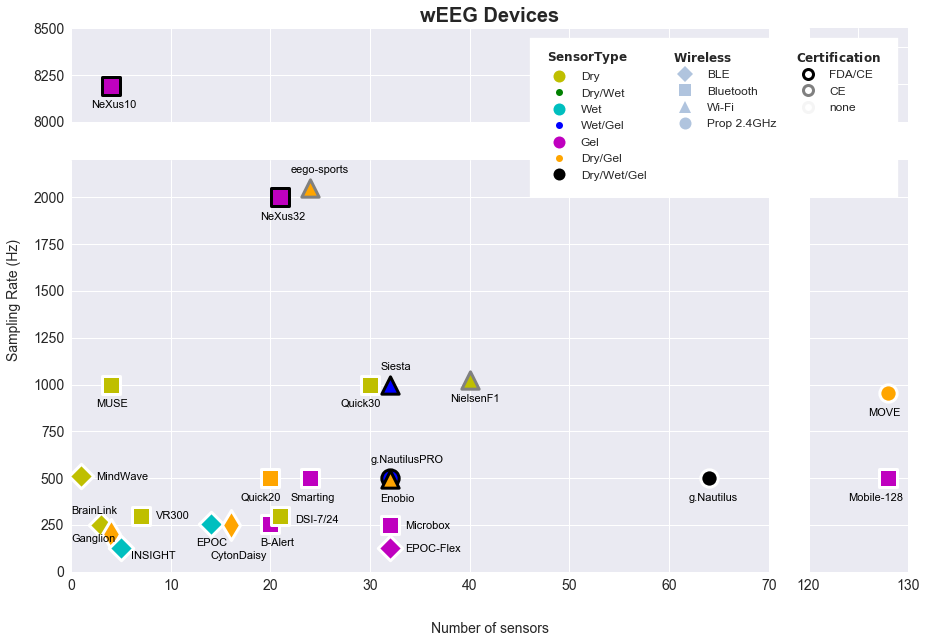

In [89]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(15,10))

bax = brokenaxes(xlims=((0,70),(120,130)), ylims=((0,2200),(8000,8500)), hspace=0.15, wspace=0.1)
                 
for ii in range(len(DATOS)):
    bax.scatter(DATOS['sensors'][ii], DATOS['sampling'][ii],s=DATOS['markersize'][ii],marker=DATOS['marker'][ii],
                facecolor=DATOS['color'][ii],edgecolor=DATOS['borde'][ii],linewidth=3)
 
plt.title('wEEG Devices', fontweight='bold', fontsize=20)
bax.set_xlabel('Number of sensors', fontsize=14, labelpad=1)
bax.set_ylabel('Sampling Rate (Hz)', fontsize=14, labelpad=50)
#plt.xticks(fontsize=FS)
bax.tick_params(axis='x', labelsize=14)
bax.tick_params(axis='y', labelsize=14)

#TEXT
fs=11

#Add white patch for legends
bax.axs[2].add_patch(Rectangle((46, 2000), 24, 200,  color='w', alpha=1))
bax.axs[3].add_patch(Rectangle((120, 2000), 9, 200, color='w', alpha=1))
bax.axs[0].add_patch(Rectangle((46, 8000), 24, 450,  color='w', alpha=1))
bax.axs[1].add_patch(Rectangle((120, 8000), 9, 450, color='w', alpha=1))

#legends
custom_markers1=[ Line2D([0],[0], marker='o',color='none',label='Dry', markerfacecolor='y', markersize=12),
                  Line2D([0],[0], marker='o',color='none',label='Dry/Wet', mfc='g',         markersize=7),
                  Line2D([0],[0], marker='o',color='none',label='Wet',     mfc='c',         markersize=12),
                  Line2D([0],[0], marker='o',color='none',label='Wet/Gel', mfc='b',         markersize=7),
                  Line2D([0],[0], marker='o',color='none',label='Gel',     mfc='m',         markersize=12),
                  Line2D([0],[0], marker='o',color='none',label='Dry/Gel', mfc='orange',    markersize=7),
                  Line2D([0],[0], marker='o',color='none',label='Dry/Wet/Gel', mfc='k',     markersize=12)]

custom_markers2=[ Line2D([0],[0], marker='D',color='none',label='BLE', markerfacecolor='lightsteelblue', markersize=12),
                  Line2D([0],[0], marker='s',color='none',label='Bluetooth',   mfc='lightsteelblue', markersize=12),
                  Line2D([0],[0], marker='^',color='none',label='Wi-Fi',       mfc='lightsteelblue', markersize=12),
                  Line2D([0],[0], marker='o',color='none',label='Prop 2.4GHz', mfc='lightsteelblue', markersize=12)]

custom_markers3=[ Line2D([0],[0], marker='o',color='none', label='FDA/CE',mfc='w', mec='k',    ms=10, mew=3),
                  Line2D([0],[0], marker='o',color='none', label='CE',    mfc='w', mec='grey', ms=10, mew=3),
                  Line2D([0],[0], marker='o',color='none', label='none',  mfc='w', mec='whitesmoke', ms=10, mew=3)]


legend1 = plt.legend(handles=custom_markers1, title=r'$\bf{Sensor Type}$', title_fontsize=12, 
                     loc='upper right',bbox_to_anchor=(0.7,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)
legend2 = plt.legend(handles=custom_markers2, title=r'$\bf{Wireless}$', title_fontsize=12,     
                     loc='upper right',bbox_to_anchor=(0.855,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)
legend3 = plt.legend(handles=custom_markers3, title=r'$\bf{Certification}$', title_fontsize=12, 
                     loc='upper right',bbox_to_anchor=(0.98,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
legend1._legend_box.align = 'left'
legend2._legend_box.align = 'left'
legend3._legend_box.align = 'left'
legend1.get_frame().set_edgecolor('w')
legend2.get_frame().set_edgecolor('w')
legend3.get_frame().set_edgecolor('w')

#abajo x-2 y-120
#arriba x-2 y+80
#derecha x+1.5 y-20

# 0 MindWave
bax.axs[2].text(DATOS['sensors'][0]+1.5, DATOS['sampling'][0]-20, 'MindWave', color='k',fontsize=fs)
# 1 BrainLink
bax.axs[2].text(DATOS['sensors'][1]-3, DATOS['sampling'][1]+60, 'BrainLink', color='k',fontsize=fs)
# 2 Ganglion
bax.axs[2].text(DATOS['sensors'][2]-4, DATOS['sampling'][2]-40, 'Ganglion', color='k',fontsize=fs)
# 3 NeXus-10
bax.axs[0].text(DATOS['sensors'][3]-2, DATOS['sampling'][3]-120, 'NeXus10', color='k',fontsize=fs)
# 4 INSIGHT
bax.axs[2].text(DATOS['sensors'][4]+1, DATOS['sampling'][4]-60, 'INSIGHT', color='k',fontsize=fs)
# 5 MUSE
bax.axs[2].text(DATOS['sensors'][5]-1.5, DATOS['sampling'][5]-120, 'MUSE', color='k',fontsize=fs)
# 6 VR300
bax.axs[2].text(DATOS['sensors'][6]+1.5, DATOS['sampling'][6]-20, 'VR300', color='k',fontsize=fs)
# 7 EPOC
bax.axs[2].text(DATOS['sensors'][7]-1.5, DATOS['sampling'][7]-120, 'EPOC', color='k',fontsize=fs)
# 8 OpenBCI
bax.axs[2].text(DATOS['sensors'][8]-2, DATOS['sampling'][8]-180, 'CytonDaisy', color='k',fontsize=fs)
# 9 B-Alert 
bax.axs[2].text(DATOS['sensors'][9]-1, DATOS['sampling'][9]-120, 'B-Alert', color='k',fontsize=fs)
# 10 Quick 20
bax.axs[2].text(DATOS['sensors'][10]-3, DATOS['sampling'][10]-120, 'Quick20', color='k',fontsize=fs)
# 11 DSI 7/24
bax.axs[2].text(DATOS['sensors'][11]+1.5, DATOS['sampling'][11]-40, 'DSI-7/24', color='k',fontsize=fs)
# 12 NeXus-32
bax.axs[2].text(DATOS['sensors'][12]-2, DATOS['sampling'][12]-120, 'NeXus32', color='k',fontsize=fs)
# 13 Smarting
bax.axs[2].text(DATOS['sensors'][13]-2, DATOS['sampling'][13]-120, 'Smarting', color='k',fontsize=fs)
# 14 eego sports
bax.axs[2].text(DATOS['sensors'][14]-2, DATOS['sampling'][14]+80, 'eego-sports', color='k',fontsize=fs)
# 15 Quick 30
bax.axs[2].text(DATOS['sensors'][15]-3, DATOS['sampling'][15]-120, 'Quick30', color='k',fontsize=fs)
# 16 Microbox
bax.axs[2].text(DATOS['sensors'][16]+1.5, DATOS['sampling'][16]-20, 'Microbox', color='k',fontsize=fs)
# 17 g.Nautilus PRO
bax.axs[2].text(DATOS['sensors'][17]-2, DATOS['sampling'][17]+80, 'g.NautilusPRO', color='k',fontsize=fs)
# 18 Enobio
bax.axs[2].text(DATOS['sensors'][18]-1, DATOS['sampling'][18]-120, 'Enobio', color='k',fontsize=fs)
# 19 Siesta Wireless 
bax.axs[2].text(DATOS['sensors'][19]-1, DATOS['sampling'][19]+80, 'Siesta', color='k',fontsize=fs)
# 20 EPOC Flex
bax.axs[2].text(DATOS['sensors'][20]+1.5, DATOS['sampling'][20]-20, 'EPOC-Flex', color='k',fontsize=fs)
# 21 Nielsen F1
bax.axs[2].text(DATOS['sensors'][21]-2, DATOS['sampling'][21]-120, 'NielsenF1', color='k',fontsize=fs)
# 22 g.Nautilus
bax.axs[2].text(DATOS['sensors'][22]-2, DATOS['sampling'][22]-120, 'g.Nautilus', color='k',fontsize=fs)
# 23 MOVE
bax.axs[3].text(DATOS['sensors'][23]-2, DATOS['sampling'][23]-120, 'MOVE', color='k',fontsize=fs)
# 24 Mobile 128
bax.axs[3].text(DATOS['sensors'][24]-4, DATOS['sampling'][24]-120, 'Mobile-128', color='k',fontsize=fs)

plt.show()